### PROJECT 01:HOUSE PRICE PREDICTION USING LINEAR REGRESSION AND ANALYSIS

Dataset Used :Boston Housing Dataset

In [25]:

import numpy as np
import pandas as pd
from sklearn import model_selection

In [19]:

data=pd.read_csv('Boston_housing.csv')
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [15]:

Y=data["medv"]
Y.head()

0    24.0
1    21.6
2    33.4
3    36.2
4    22.9
Name: medv, dtype: float64

In [24]:

housing_df=data.drop(["ID","medv"],axis=1)
print(housing_df.shape)
housing_df.head()

(333, 13)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


In [22]:

housing_df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

Splitting the data

In [26]:

X_train,X_test,Y_train,Y_test=model_selection.train_test_split(housing_df,Y,test_size=0.3)#splitting the data into 70% training and 30 % testing
X_train.shape

(233, 13)

Generating the model

In [29]:
from sklearn import linear_model
alg=linear_model.LinearRegression()
alg.fit(X_train,Y_train)
y_predict=alg.predict(X_test)

Evaluation

In [36]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_predict,Y_test)
print("MSE=",mse)


weights=alg.coef_
intercept=alg.intercept_
print("Coefficients are:",weights)
print("Intercept value is:",intercept)

MSE= 30.68327516463012
Coefficients are: [-0.06252341  0.04209701  0.02088156  4.28682606 -6.66824615  4.3039908
 -0.02719066 -1.47888247  0.23979059 -0.0124288  -0.73299678  0.01487214
 -0.49474319]
Intercept value is: 23.285654643178038


In [44]:

print("Test Score:",alg.score(X_test,Y_test))
print("Train Score:",alg.score(X_train,Y_train))

Test Score: 0.6715352989001961
Train Score: 0.7509565636515991


Since our score is close enough to 1 we can clearly see that our algorithm has performed well on testing data but there is still scope for improvement.
Also the training score is not very close to 1 we can also assure that there is no Overfitting

Plotting the Graph

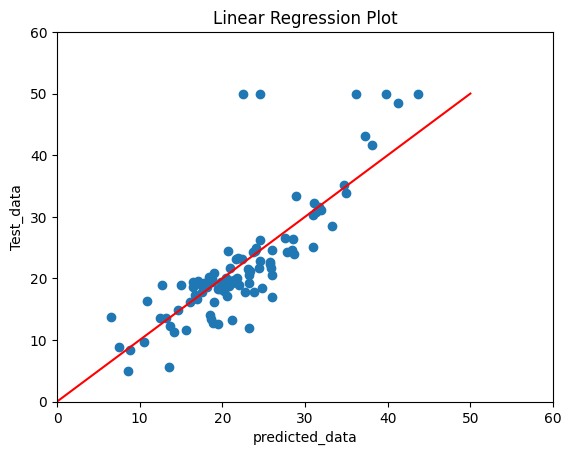

In [65]:
import matplotlib.pyplot as plt
plt.plot([0,1,5,50],[0,1,5,50],'r-')
plt.axis([0,60,0,60])
plt.scatter(y_predict,Y_test)
plt.title('Linear Regression Plot')
plt.ylabel('Test_data')
plt.xlabel('predicted_data')
plt.show()

The plot shows that the Linear Regression algorithm ins working well as most of the points are near the line y=x although there are a few outlaws which can be taken care of with more advanced algorithms.